In [1]:
#Import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pandas import *

In [62]:
#Loading data
df = pd.read_csv('../data/rfm.csv', encoding = 'utf-8',index_col=None, sep = '\t')
df.head()

,CustomerID,frequency,monetary_value,recency,r,f,m,rfm,rfm_score,Segment
0,12820.0,59,942.34,3,1,2,2,122,1.67,potential loyalists
1,12821.0,6,92.72,214,4,4,4,444,4.00,hibernating
2,12822.0,46,948.88,70,3,2,2,322,2.33,at risk
3,12823.0,5,1759.50,74,3,4,1,341,2.67,hibernating
4,12824.0,25,397.12,59,3,3,3,333,3.00,hibernating


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 10 columns):
CustomerID        3521 non-null float64
frequency         3521 non-null int64
monetary_value    3521 non-null float64
recency           3521 non-null int64
r                 3521 non-null int64
f                 3521 non-null int64
m                 3521 non-null int64
rfm               3521 non-null int64
rfm_score         3521 non-null float64
Segment           3521 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 275.1+ KB


In [29]:
#We want to find labels for customers usinf the rfm table 
X = df.iloc[:, 1:7]

### Train test split and standardization

In [30]:
#Train, val and test split
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X, test_size=0.3)

X_val, X_test = train_test_split(X_val, test_size=0.3)

In [31]:
#Standardization of our datas
from sklearn.preprocessing import StandardScaler
import pickle

# Create scaler object
scaler = StandardScaler() 
#Fit scalar object to our train set
scaler.fit(X_train)

#Save the model
#filename = 'standardization.pkl'
#pickle.dump(scaler, open(filename, 'wb'))

#Transform train, val and test into standardize datas
X_train = pd.DataFrame(scaler.transform(X_train))
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_scal = scaler.fit_transform(X)

/home/celiabayet/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/home/celiabayet/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/home/celiabayet/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


### Kmeans

In [59]:
#Using two different metrics to choose the numbers of clusters :

from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

#Within-Cluster-Sum-of-Squares
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    kmeans.predict(X_val)
    wcss.append(kmeans.inertia_)

#Silhouette score
silhouettes = []
for i in range(2,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    cluster = kmeans.predict(X_val)
    silh = metrics.silhouette_score(X_val, cluster)
    silhouettes.append(silh)

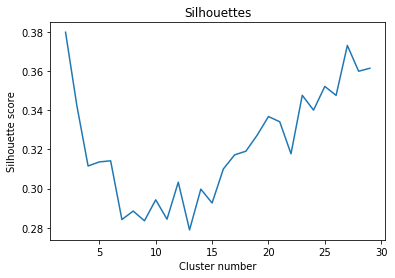

In [60]:
#Plot of the silhouette score 
plt.plot(range(2,30), silhouettes)
plt.title('Silhouettes')
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')
plt.show()

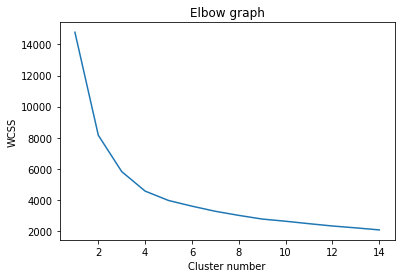

In [49]:
#Plot of the Elbow graph
plt.plot(range(1,15), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

According to the graphs above, we choose 4 clusters for our algorithm

In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X_train)
cluster_test = kmeans.predict(X_test)
print('The silhouette score is {}'.format(metrics.silhouette_score(X_test,cluster_test)))

The silhouette score is 0.332431095907


In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X)
df['clusters'] = clusters
df.sample(10)

,CustomerID,frequency,monetary_value,recency,r,f,m,rfm,rfm_score,Segment,clusters
3284,17925.0,1,244.08,372,4,4,4,444,4.00,hibernating,1
1174,14670.0,132,411.53,280,4,1,3,413,2.67,can't loose,1
1275,14840.0,4,62.85,267,4,4,4,444,4.00,hibernating,1
878,14217.0,100,2004.98,1,1,2,1,121,1.33,potential loyalists,2
2430,16593.0,27,330.03,50,2,3,3,233,2.67,potential loyalists,1
2347,16460.0,135,814.72,28,2,1,2,212,1.67,loyal customers,3
1467,15142.0,26,498.74,46,2,3,3,233,2.67,potential loyalists,1
2201,16235.0,46,867.31,40,2,2,2,222,2.00,potential loyalists,3
938,14307.0,180,2995.72,88,3,1,1,311,1.67,loyal customers,0
1346,14963.0,198,1487.80,9,1,1,2,112,1.33,champions,2


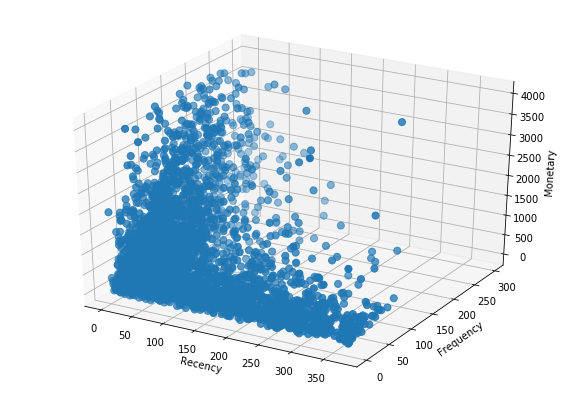

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.recency, df.frequency, df.monetary_value, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

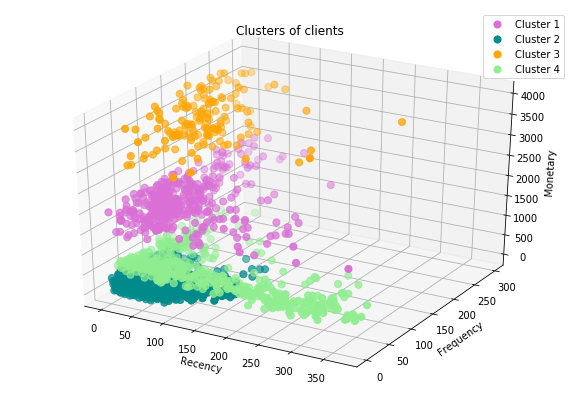

In [81]:
fig = plt.figure(figsize=(10,7))
dx = fig.add_subplot(111, projection='3d')
colors = ['orchid','darkcyan', 'orange', 'lightgreen']

for i in range(0,4):
    dx.scatter(df[df.clusters == i].recency, 
               df[df.clusters == i].frequency, 
               df[df.clusters == i].monetary_value, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

plt.show()

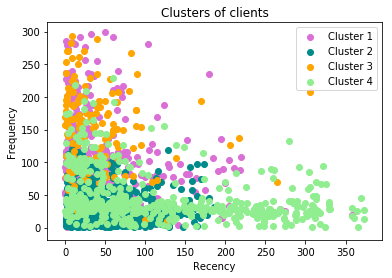

In [80]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]

plt.scatter(c1.recency, c1.frequency, c = 'orchid', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'darkcyan', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c =  'orange', label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c =  'lightgreen', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

plt.show()

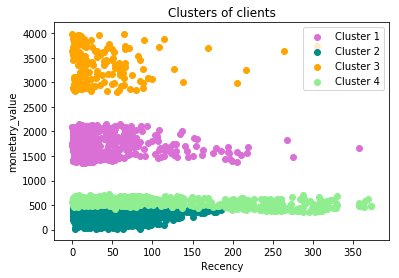

In [79]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]

plt.scatter(c1.recency, c1.monetary_value, c = 'orchid', label = 'Cluster 1')
plt.scatter(c2.recency, c2.monetary_value, c = 'darkcyan', label = 'Cluster 2')
plt.scatter(c3.recency, c3.monetary_value, c =  'orange', label = 'Cluster 3')
plt.scatter(c4.recency, c4.monetary_value, c =  'lightgreen', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('monetary_value')
plt.legend()

plt.show()

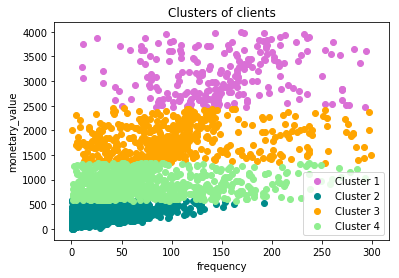

In [41]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]

plt.scatter(c1.frequency, c1.monetary_value, c = 'orchid', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary_value, c = 'darkcyan', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary_value, c =  'orange', label = 'Cluster 3')
plt.scatter(c4.frequency, c4.monetary_value, c =  'lightgreen', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('frequency')
plt.ylabel('monetary_value')
plt.legend()

plt.show()

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_trans = pca.transform(X_train)

pca.explained_variance_ratio_.cumsum()

array([0.63610617, 0.84558195])

### Ward  

In [57]:
from sklearn.cluster import AgglomerativeClustering

silhouettes = []
for n in range(2,30) :
    ward = AgglomerativeClustering(n_clusters=n, linkage='ward')
    ward.fit(X_train)
    cluster = ward.fit_predict(X_val)
    silh = metrics.silhouette_score(X_val, cluster)
    silhouettes.append(silh)

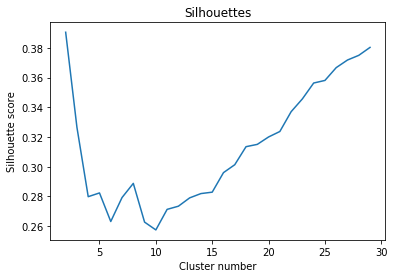

In [58]:
#Plot of the silhouette score 
plt.plot(range(2,30), silhouettes)
plt.title('Silhouettes')
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')
plt.show()

In [63]:
ward = AgglomerativeClustering(n_clusters=8, linkage='ward')
cluster = ward.fit_predict(X)

df1 = df

In [66]:
df1['clusters'] = cluster
df1.head()

,CustomerID,frequency,monetary_value,recency,r,f,m,rfm,rfm_score,Segment,cluster,clusters
0,12820.0,59,942.34,3,1,2,2,122,1.67,potential loyalists,6,6
1,12821.0,6,92.72,214,4,4,4,444,4.00,hibernating,7,7
2,12822.0,46,948.88,70,3,2,2,322,2.33,at risk,6,6
3,12823.0,5,1759.50,74,3,4,1,341,2.67,hibernating,0,0
4,12824.0,25,397.12,59,3,3,3,333,3.00,hibernating,1,1


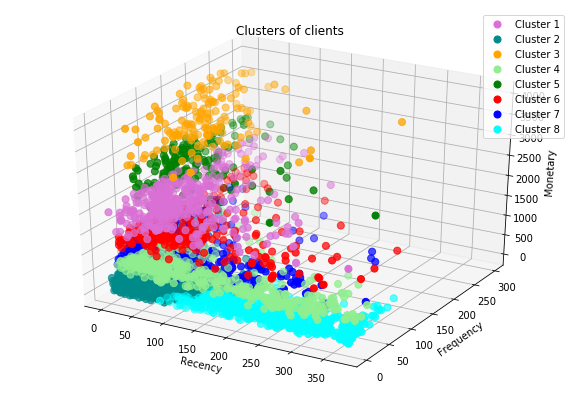

In [67]:
fig = plt.figure(figsize=(10,7))
dx = fig.add_subplot(111, projection='3d')
colors = ['orchid','darkcyan', 'orange', 'lightgreen','green','red','blue','cyan']

for i in range(0,8):
    dx.scatter(df[df.clusters == i].recency, 
               df[df.clusters == i].frequency, 
               df[df.clusters == i].monetary_value, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

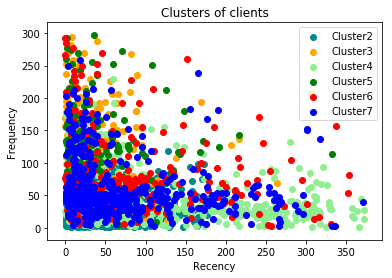

In [70]:
clus = []
for i in range(0,7) :
    clus.append(df1[df1.clusters == i])

cluster_name = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','Cluster5', 'Cluster6', 'Cluster7', 'Cluster8']

for i in range(1,7) :
    plt.scatter(clus[i].recency, clus[i].frequency, c = colors[i], label = cluster_name[i])

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

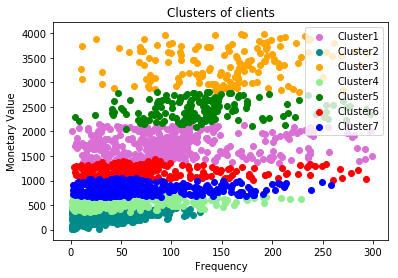

In [77]:
clus = []
for i in range(0,7) :
    clus.append(df1[df1.clusters == i])

cluster_name = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','Cluster5', 'Cluster6', 'Cluster7', 'Cluster8']

for i in range(0,7) :
    plt.scatter(clus[i].frequency, clus[i].monetary_value, c = colors[i], label = cluster_name[i])

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend()

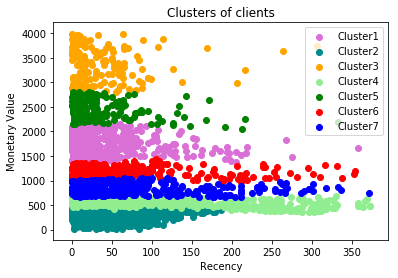

In [76]:
clus = []
for i in range(0,7) :
    clus.append(df1[df1.clusters == i])

cluster_name = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','Cluster5', 'Cluster6', 'Cluster7', 'Cluster8']

for i in range(0,7) :
    plt.scatter(clus[i].recency, clus[i].monetary_value, c = colors[i], label = cluster_name[i])

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend()